# Latar Belakang
Airbnb merupakan platform penyewaan akomodasi jangka pendek yang populer di seluruh dunia, termasuk di kota Bangkok. Ribuan properti ditawarkan oleh host yang ingin mendapatkan pemasukan tambahan dari menyewakan rumah, apartemen, atau kamar pribadi. Persaingan di antara host sangat tinggi, sehingga mereka harus memahami karakteristik listing yang dapat menarik minat penyewa, mulai dari harga, lokasi, hingga jenis kamar.

Sebagai perusahaan platform, Airbnb juga memerlukan insight untuk memahami kondisi pasar dan preferensi pengguna. Informasi ini penting untuk membantu pemilik properti dalam mengoptimalkan listing mereka, serta membantu Airbnb dalam memberikan dukungan, promosi, atau rekomendasi yang lebih tepat.

## Pernyataan Masalah

Perusahaan ingin memahami **karakteristik listing Airbnb di Bangkok yang menunjukkan tingkat aktivitas tinggi**, khususnya dalam hal **apakah listing tersebut pernah menerima review atau tidak**. 

Fokus utama analisis ini adalah untuk mengevaluasi **perbedaan karakteristik antara listing yang aktif (pernah direview)** dan **listing yang tidak aktif (belum pernah direview)** berdasarkan beberapa faktor penting seperti:

- Harga sewa per malam
- Tipe kamar (room type)
- Lokasi atau wilayah listing (neighbourhood)
- Tingkat ketersediaan listing (availability)
- jumlah review
- Durasi minimal pemesanan

Informasi ini akan membantu perusahaan dan para host untuk:

- Mengidentifikasi tipe akomodasi yang lebih sering diminati pengguna
- Mengetahui wilayah yang memiliki potensi lebih tinggi untuk disewa
- Mengoptimalkan tingkat ketersediaan listing agar lebih sering tampil dan direview

Sebagai seorang data analyst, kita akan menjawab pertanyaan berikut:

**Bagaimana karakteristik listing Airbnb di Bangkok yang aktif (pernah menerima review), jika dibandingkan dengan listing yang tidak aktif (belum pernah direview)?**


# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1A_KBMRFTS5Mthpp46nulso679ML4ZwTF). Dan berikut adalah uraian dari dataset tersebut


| **Fitur**                          | **Deskripsi**                                                      |
|------------------------------------|---------------------------------------------------------------------|
| `id`                               | ID unik untuk setiap listing                                       |
| `name`                             | Nama listing                                                       |
| `host_id`                          | ID unik dari host/pemilik listing                                  |
| `host_name`                        | Nama dari host listing                                             |
| `neighbourhood`                   | Distrik atau wilayah tempat listing berada                         |
| `latitude`                         | Koordinat garis lintang lokasi listing                             |
| `longitude`                        | Koordinat garis bujur lokasi listing                               |
| `room_type`                        | Jenis ruang akomodasi (Entire home/apt, Private room, Shared room) |
| `price`                            | Harga sewa per malam (dalam mata uang lokal)                       |
| `minimum_nights`                   | Minimal jumlah malam untuk pemesanan                               |
| `number_of_reviews`                | Total review yang diterima oleh listing                            |
| `last_review`                      | Tanggal review terakhir dilakukan                                  |
| `reviews_per_month`               | Rata-rata jumlah review yang diterima per bulan                    |
| `calculated_host_listings_count`  | Jumlah listing yang dimiliki oleh host tersebut                    |
| `availability_365`                | Jumlah hari dalam 1 tahun listing tersedia untuk disewa            |
| `number_of_reviews_ltm`           | Jumlah review yang diterima dalam 12 bulan terakhir                |


# **1.Load Dataset**

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [80]:
df = pd.read_csv(r"C:\Users\dhika\Documents\Purwadhika Datascience\Part 2 - Data Analysis\Capstone 2\Airbnb Listings Bangkok-20250627T013929Z-1-001\Airbnb Listings Bangkok\Airbnb Listings Bangkok.csv")
display(df.head(),df.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


In [81]:
display(df.describe(), df.describe(include='object'))

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [82]:
pd.set_option('display.max_colwidth', 1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Unnamed: 0,15854,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]"
1,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
2,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel roo

Secara umum, kita bisa melihat bahwa:

* Dataset Airbnb memiliki **16 kolom dan 15.854 baris**.
* Kolom `Unnamed: 0`, `id`, `host_id`, `host_name`, dan `name` merupakan informasi yang **tidak relevan** untuk keperluan analisis dan visualisasi, sehingga **dihapus** dari dataset.
* Kolom `last_review` awalnya memiliki tipe data **object** (string), tetapi sebenarnya berisi informasi tanggal. Kolom ini telah dikonversi ke **datetime64[ns]** untuk mendukung analisis berbasis waktu.
* Kolom `price`, `minimum_nights`, dan `reviews_per_month` memiliki nilai ekstrim (outlier).  
  - `price`: maksimum 1.100.000 THB  
  - `minimum_nights`: maksimum 1.125 malam  
  - `reviews_per_month`: maksimum 19.13  
  Untuk menghindari bias saat visualisasi, dilakukan **filter berdasarkan kuantil ke-95 (95th percentile)**.

## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umur dari dataset hr_analytics.

In [83]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (15854, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854

data `id` dan `host_id` perlu diubah tipe datanya 

In [84]:
df['id'] = df['id'].astype(str)
df['host_id'] = df['host_id'].astype(str)

data `last_review` diubah tipe datanya menjadi datetime 

In [85]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [86]:
print(df.isna().sum())

Unnamed: 0                        0   
id                                0   
name                              8   
host_id                           0   
host_name                         1   
neighbourhood                     0   
latitude                          0   
longitude                         0   
room_type                         0   
price                             0   
minimum_nights                    0   
number_of_reviews                 0   
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count    0   
availability_365                  0   
number_of_reviews_ltm             0   
dtype: int64


In [87]:
# menghitung presentase missing values
df["name"].isna().sum()/len(df['name']) * 100

0.050460451621042006

In [88]:
df["host_name"].isna().sum()/len(df['host_name']) * 100

0.006307556452630251

Melakukan drop kolom yang tidak relevan digunakan dalam dataset

In [89]:
df_cleaned = df.copy()
df_cleaned.drop(columns=['Unnamed: 0'], inplace=True)
df_cleaned.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaT,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaT,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaT,NaN,3,365,0


Mari lakukan cek pada duplikasi data, kita perlu mealkukan drop data yang terduplikasi

In [90]:
df_cleaned.duplicated().sum()

0

In [91]:
df_cleaned.drop_duplicates(inplace=True)

In [92]:
df_cleaned.isna().sum()

id                                0   
name                              8   
host_id                           0   
host_name                         1   
neighbourhood                     0   
latitude                          0   
longitude                         0   
room_type                         0   
price                             0   
minimum_nights                    0   
number_of_reviews                 0   
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count    0   
availability_365                  0   
number_of_reviews_ltm             0   
dtype: int64

In [93]:
# persentase missing value di tiap kolom
df_cleaned.isna().sum()/df_cleaned.shape[0]*100

id                                0.000000 
name                              0.050460 
host_id                           0.000000 
host_name                         0.006308 
neighbourhood                     0.000000 
latitude                          0.000000 
longitude                         0.000000 
room_type                         0.000000 
price                             0.000000 
minimum_nights                    0.000000 
number_of_reviews                 0.000000 
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count    0.000000 
availability_365                  0.000000 
number_of_reviews_ltm             0.000000 
dtype: float64

<Axes: >

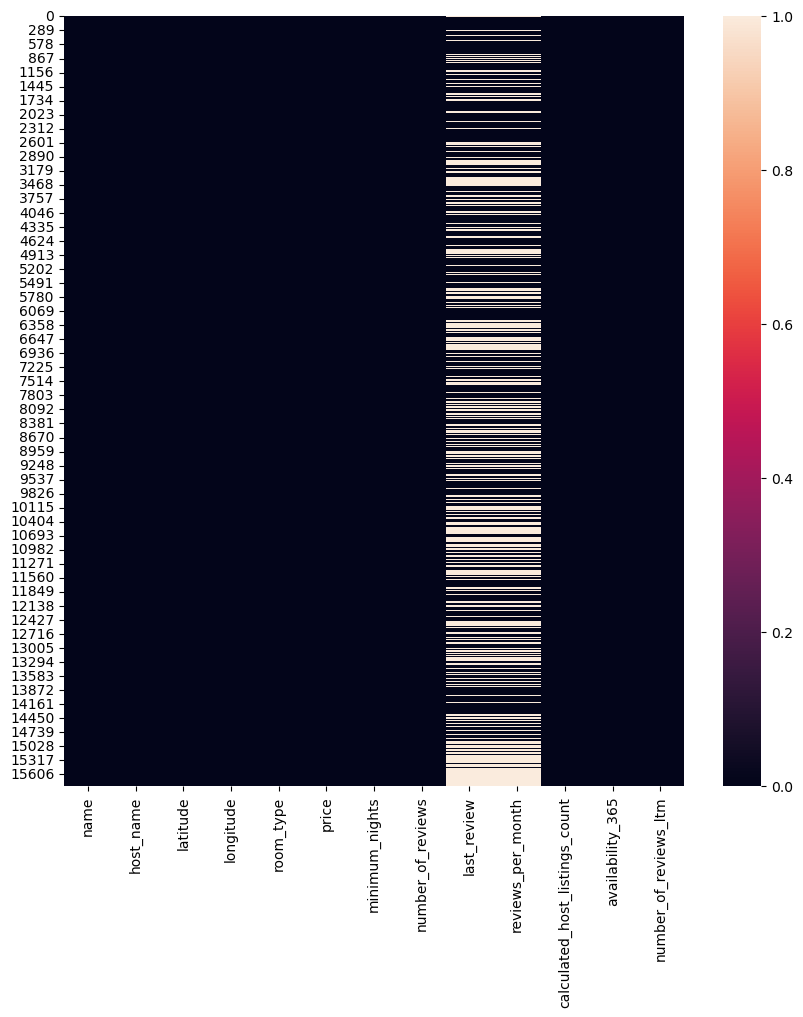

In [94]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df_cleaned[['name','host_name','latitude','longitude','room_type','price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']].isna())

Setelah menggunakan heatmap maka terlihat bahwa kolom `last_review` dan `reviews_per_month` memiliki posisi dan jumlah missing values yang sama. Namun pada informasi sebelumnya diperlihatkan juga bahwa kolom `name` dan `host_name` memiliki sedikit missing values yang nilainya < 1%.

Ada 2 cara untuk menangani *missing value*:
* pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini tidak disarankan untuk kolom  `last_review` dan `reviews_per_month` , karena jumlah missing value yang tergolong cukup tinggi (sampai 36%).
* kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*. Menghapus data akan menjadi opsi terakhir.

Keputusan berdasarkan domain knowledge
* Kolom `last_review`, dan `reviews_per_month` memiliki **nilai kosong (NaN)** dengan persentase yang tinggi dan cenderung sama unutk posisi missing valuesnya.  
  - `reviews_per_month`: kosong karena listing belum pernah direview → diisi dengan `0`. karena jika diisi dengan median, datanya akan bias karena jumlah missing valuesnya yang sangat banyak. Hal ini juga diperkuat dengan keterkaitan kolom tersebut dengan kolom `number_of_reviews` dimana saat kolom `number_of_reviews` bernilai 0 maka kolom ini juga **Nan**
  - `last_review`: tetap dibiarkan kosong (`NaT`) karena merepresentasikan bahwa listing belum memiliki review.
* Solusi tambahan --> menambahkan kolom baru bernama `has_review` untuk memisahkan atau merepresentasikan missing values pada dua kolom sebelumnya saat dikaitkan dengan kolom lain

In [95]:
# malekukan handling missing values pada kolom name dan host name dengan mendrop data
df_cleaned.dropna(subset=['name','host_name'], inplace=True)
df_cleaned.isna().sum()

id                                0   
name                              0   
host_id                           0   
host_name                         0   
neighbourhood                     0   
latitude                          0   
longitude                         0   
room_type                         0   
price                             0   
minimum_nights                    0   
number_of_reviews                 0   
last_review                       5784
reviews_per_month                 5784
calculated_host_listings_count    0   
availability_365                  0   
number_of_reviews_ltm             0   
dtype: int64

In [96]:
df_cleaned.loc[(df['reviews_per_month'].isna()) & (df['number_of_reviews'] == 0), 'reviews_per_month'] = 0
df_cleaned['reviews_per_month'].isna().sum()

0

In [97]:
df_cleaned.isna().sum()

id                                0   
name                              0   
host_id                           0   
host_name                         0   
neighbourhood                     0   
latitude                          0   
longitude                         0   
room_type                         0   
price                             0   
minimum_nights                    0   
number_of_reviews                 0   
last_review                       5784
reviews_per_month                 0   
calculated_host_listings_count    0   
availability_365                  0   
number_of_reviews_ltm             0   
dtype: int64

* Untuk membedakan listing yang pernah direview atau tidak, dibuat kolom baru bernama `has_review`, hal ini dilakukan untuk memudahkan proses visualisasi pada tahapan selanjutnya:  

In [98]:
df_cleaned['has_review'] = df_cleaned['last_review'].notnull().astype(int)

In [99]:
display(df_cleaned.describe(),df_cleaned.describe(include='object'))

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,has_review
count,15845.000000,15845.000000,1.584500e+04,15845.000000,15845.000000,10061,15845.000000,15845.000000,15845.000000,15845.000000,15845.000000
mean,13.745148,100.559895,3.218580e+03,15.299905,16.663048,2021-08-30 19:10:44.428983040,0.516464,13.896813,244.319281,3.483496,0.634964
min,13.527300,100.329550,0.000000e+00,1.000000,0.000000,2012-12-15 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000
25%,13.720090,100.529690,9.000000e+02,1.000000,0.000000,2020-02-20 00:00:00,0.000000,1.000000,138.000000,0.000000,0.000000
50%,13.738490,100.561400,1.429000e+03,1.000000,2.000000,2022-10-24 00:00:00,0.090000,4.000000,309.000000,0.000000,1.000000
75%,13.759490,100.585140,2.429000e+03,7.000000,13.000000,2022-12-08 00:00:00,0.670000,13.000000,360.000000,3.000000,1.000000
max,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,2022-12-28 00:00:00,19.130000,228.000000,365.000000,325.000000,1.000000
std,0.043044,0.050915,2.497917e+04,50.828453,40.623125,NaN,0.952948,30.276935,125.849614,8.919083,0.481456


,id,name,host_id,host_name,neighbourhood,room_type
count,15845,15845,15845,15845,15845,15845
unique,15845,14793,6651,5306,50,4
top,27934,New! La Chada Night Market studio 2PPL near MRT,201677068,Curry,Vadhana,Entire home/apt
freq,1,45,228,228,2151,8911


Data divisualiasikan untuk kolom numerik unutk melihat data yang outlier

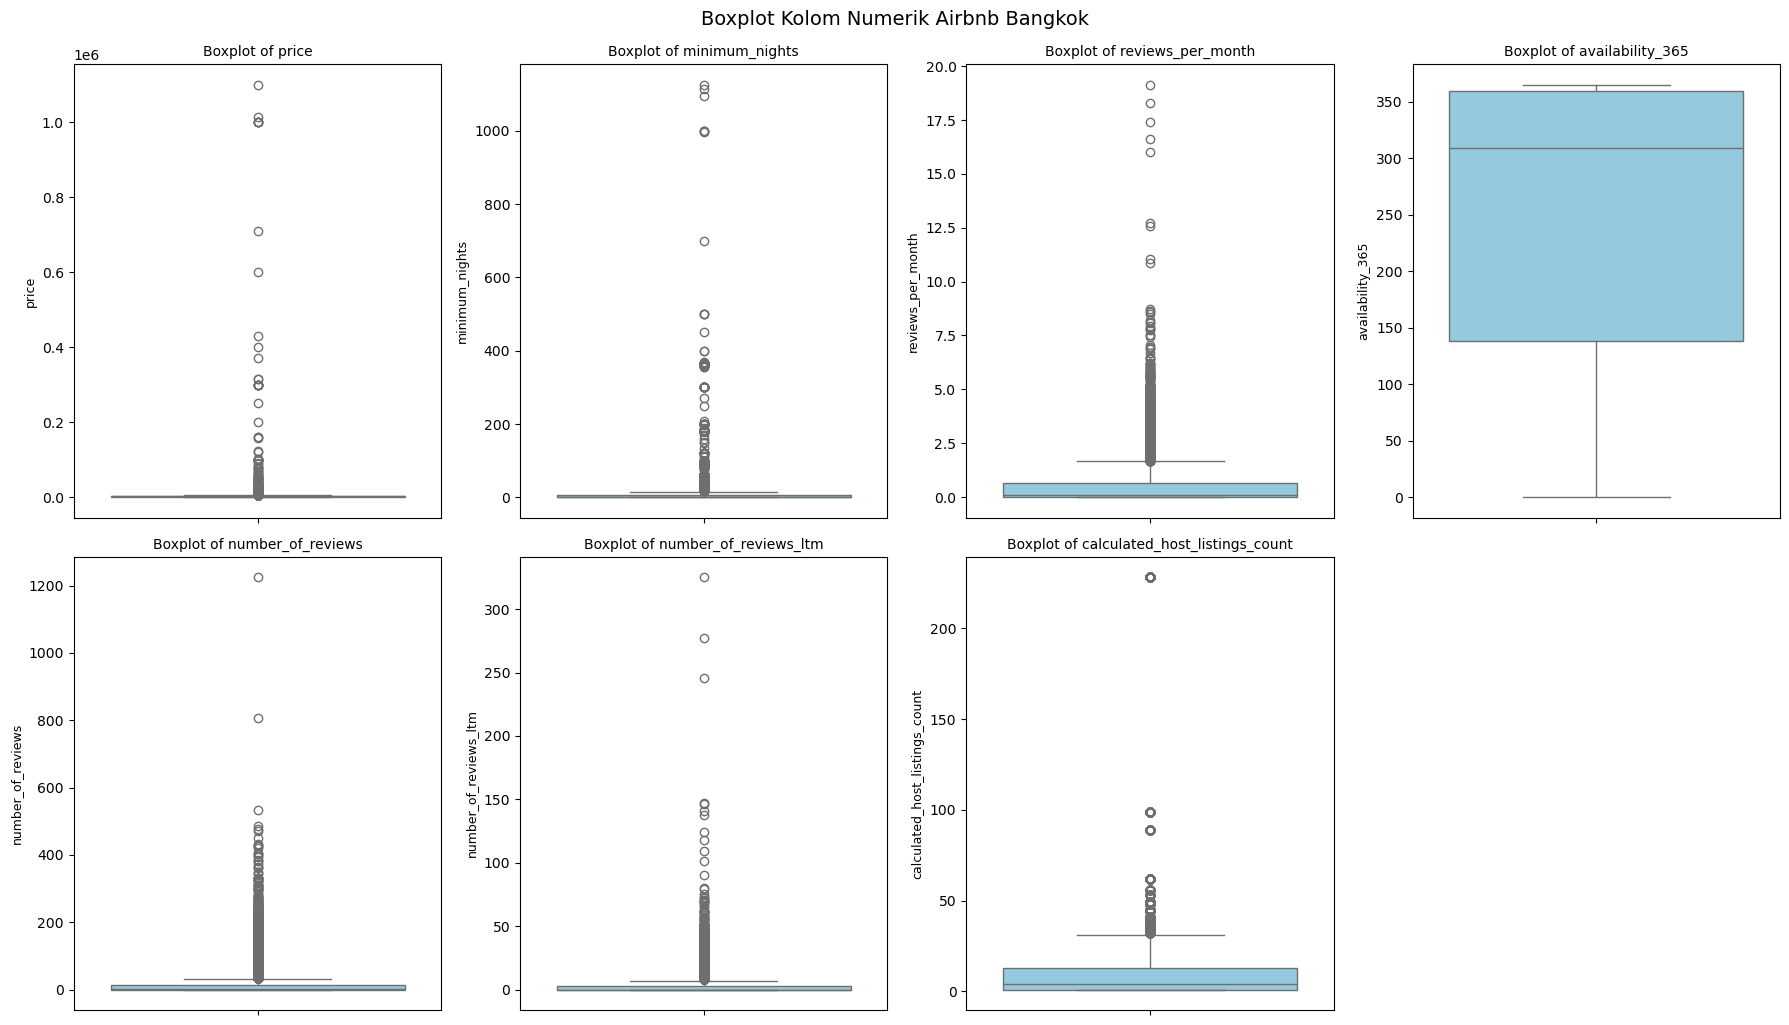

In [100]:
# Kolom numerik yang ingin divisualisasikan
num_cols = [
    'price',
    'minimum_nights',
    'reviews_per_month',
    'availability_365',
    'number_of_reviews',
    'number_of_reviews_ltm',
    'calculated_host_listings_count'
]

# Ukuran canvas
plt.figure(figsize=(18, 10))

# Buat subplot untuk setiap kolom
for i, col in enumerate(num_cols):
    plt.subplot(2, 4, i + 1)  # 2 baris x 4 kolom (karena 7 kolom)
    sns.boxplot(y=df_cleaned[col], color='skyblue')  # arahkan ke sumbu y
    plt.title(f'Boxplot of {col}', fontsize=10)
    plt.ylabel(col, fontsize=9)
    plt.xlabel("")  # biar tidak terlalu padat
    plt.tight_layout()

plt.suptitle('Boxplot Kolom Numerik Airbnb Bangkok', fontsize=14, y=1.02)
plt.show()

Terlihat bahwa data numerik cenderung memiliki terlalu banyak data outlier extreme, Namun kita perlu melakukan analisis lagi apakah data tersebut memang outliers atau memang menggambarkan keadaan sesungguhnya. Berikut adalah pengujian untuk melihat data outliers

cek dari `minimum_nights` merupakan representasi yang paling mudah karena menggambarkan keadaan langsung dari kondisi tempat sewa, apartemen dan private room mungkin saja punya kebijakan yang lebih menekankan minimum sewa dibandingkan dengan hotel dan shared room, mka dari itu kita akan melihat bagaimana jika `minimum_nights` di atas 90 di representasikan berdasarkan `room_type` 

In [101]:
check_outliers = df_cleaned.loc[(df_cleaned['minimum_nights']>90)]

In [102]:
check_outliers.groupby('room_type').size().reset_index(name='Total')


,room_type,Total
0,Entire home/apt,339
1,Hotel room,1
2,Private room,108
3,Shared room,3


Setelah dilakukan pengecekan, dugaan atau asumsi mendapatkan kebenaran bahwa kebanyakan nilai outliers berasal dari Entire Home/Apt dan Private Room, sehingga data outliers tiak perlu dihapus

In [103]:
hotel_data = df_cleaned[df_cleaned['room_type'] == 'Hotel room']
threshold_95 = hotel_data['minimum_nights'].quantile(0.95)
check_outliers2 = hotel_data[hotel_data['minimum_nights'] > threshold_95]
check_outliers2

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,has_review
2978,16965815,↙↗Glamorous 1BR↙↗BTS NANA! Great Pool ↙↗,62257044,Ludoping,Vadhana,13.74328,100.55463,Hotel room,1870,5,53,2022-10-12,0.74,56,150,10,1
3333,18135564,Superior Room BF - Oriental Heritage Residence,49931274,Pisith,Bang Rak,13.72637,100.51482,Hotel room,3786,7,1,2018-01-01,0.02,2,0,0,1
3495,18694829,"Special price Platinum, Siam, Chitlom BTS",122455569,Phanit,Ratchathewi,13.74935,100.54612,Hotel room,1320,3,2,2019-11-19,0.03,10,365,0,1
4215,22106916,CBD Home office /sky swimming pool-monthly flat,115758511,JSHome Luxury,Khlong Toei,13.72454,100.56682,Hotel room,2500,28,49,2022-05-15,0.81,22,88,2,1
4275,22488327,Superior Room : Chinese Settlers (Room 1),164923659,1905 Heritage Corner,Phra Nakhon,13.75172,100.49712,Hotel room,7000,28,1,2018-02-11,0.02,3,365,0,1
4280,22490370,Standard Room : Tea Room (Room 3),164923659,1905 Heritage Corner,Phra Nakhon,13.75164,100.49709,Hotel room,4400,28,0,NaT,0.00,3,365,0,0
4281,22491355,Superior Room : Colonial (Room 2),164923659,1905 Heritage Corner,Phra Nakhon,13.75164,100.49709,Hotel room,7000,28,3,2019-04-14,0.06,3,365,0,1
4282,22500325,302 - The Jatu Standard @Maneeya Park,13598910,David,Bang Na,13.68296,100.61304,Hotel room,2200,3,1,2019-06-07,0.02,7,365,0,1
4283,22509651,301 - The Dusit Executive Suite @Maneeya Park,13598910,David,Bang Na,13.68171,100.61453,Hotel room,2500,3,2,2019-08-11,0.04,7,358,0,1
4289,22510651,202 - The Jatu Standard @Maneeya Park,13598910,David,Bang Na,13.68294,100.61504,Hotel room,2200,3,2,2019-04-05,0.04,7,365,0,1


## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan.
**Untuk `Last_review` sengaja tidak dihilangkan karena untuk visualisasi di tahapan lainnya**

In [104]:
listItem = []
for col in df_cleaned.columns :
    listItem.append([col, df_cleaned[col].dtype, df_cleaned[col].isna().sum(),
                    df_cleaned[col].nunique(), list(df_cleaned[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df_cleaned.shape)
dfDesc

(15845, 17)


,dataFeatures,dataType,null,unique,uniqueSample
0,id,object,0,15845,"[18985297, 708275653599102817]"
1,name,object,0,14793,"[1 min walk to BTS N1 Station.A. Near Siam, MBK, Private Room, City Center, MRT, WiFi, Netflix A1]"
2,host_id,object,0,6651,"[219834607, 10047160]"
3,host_name,object,0,5306,"[Tib, Domenico]"
4,neighbourhood,object,0,50,"[Saphan Sung, Thawi Watthana]"
5,latitude,float64,0,9602,"[13.67775, 13.65773]"
6,longitude,float64,0,10222,"[100.57729, 100.53016]"
7,room_type,object,0,4,"[Entire home/apt, Private room]"
8,price,int64,0,3040,"[708, 5590]"
9,minimum_nights,int64,0,86,"[55, 88]"


Sebelum dibersihkan, kita memiliki 15,854 baris data, sekarang kita memiliki 15,830 baris. Ada 24 baris data yang terduplikasi dihapus, dan data yang kosong diisi dengan data yang dirasa berkaitan atau relevan dengan kolom lainnya. 

## Data Analysis

Kita telah menyelesaikan tahap _data cleaning_, termasuk penanganan _missing values_, serta pembuatan kolom tambahan seperti `has_review` untuk memudahkan analisis. Sekarang, kita dapat melanjutkan ke tahap analisis untuk mencari tahu **bagaimana karakteristik listing Airbnb di Bangkok yang memiliki tingkat aktivitas tinggi**.

> **Aktivitas tinggi** di sini diukur berdasarkan beberapa metrik penting:
> - `number_of_reviews` → total review sepanjang waktu
> - `reviews_per_month` → frekuensi review bulanan
> - `availability_365` → seberapa sering listing tersedia dalam setahun
> - `number_of_reviews_ltm` → jumlah review dalam 12 bulan terakhir

Karena distribusi pada metrik-metrik tersebut **cenderung tidak merata (skewed)** dan listing dengan performa tinggi hanya sebagian kecil dari total data, maka analisis akan berfokus pada perbandingan **rasio dan distribusi antar kategori**, terutama pada fitur-fitur berikut:

### Fitur Kategorikal
- `room_type` → jenis akomodasi (Entire home/apt, Private room, Shared room)
- `neighbourhood` → wilayah/distrik di Bangkok

### Fitur Numerik
- `price` → harga per malam
- `minimum_nights` → minimal malam pemesanan
- `calculated_host_listings_count` → jumlah listing yang dimiliki host
- `availability_365` → jumlah hari listing aktif dalam setahun
- `number_of_reviews`
- `reviews_per_month`
- `number_of_reviews_ltm`

---

Analisis ini bertujuan untuk:
- Mengidentifikasi **faktor-faktor utama yang memengaruhi performa listing**
- Menemukan **pola tren harga, lokasi, dan tipe kamar** pada listing aktif
- Memberikan insight untuk pembuatan **dashboard visual interaktif**




In [105]:
df_cleaned['has_review'].value_counts()

has_review
1    10061
0    5784 
Name: count, dtype: int64

## Berdasarkan Distrik atau wilayah: `neighbourhood`, `room_type` dan `price`  

Pertama, mari kita lihat bagaimana pengaruh Distrik atau wilayah terhadap aktivitas penyewaan berdasarkan `has_review`. Kita akan menganalisis kolom  `neighbourhood` , `room_type` dan `price` untuk menjawab beberapa pertanyaan.

* Distrik mana yang memiliki paling banyak listing?
* Distrik mana yang memiliki paling banyak listing **yang aktif atau di review**?
* Apakah ada perbedaan `room_type` dari Distrik atau wilayah yang sering di review dengan tidak?
* Apakah terdapat perbedaan harga listing yang direview berdasarkan jenis kamar?

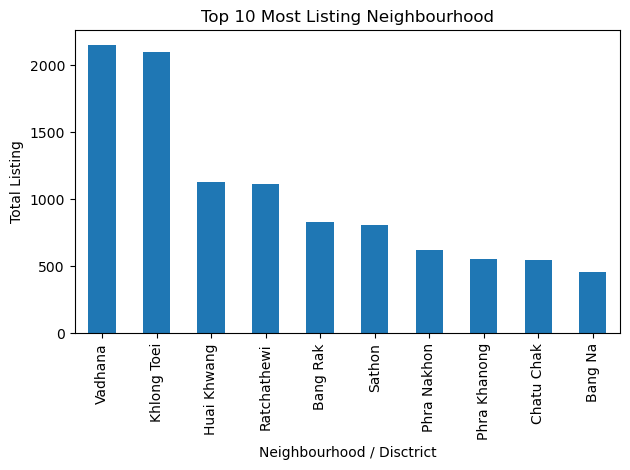

In [133]:
listing_neighbourhood = df_cleaned['neighbourhood'].value_counts().sort_values(ascending=False)

listing_neighbourhood.head(10).plot(kind='bar')
plt.title('Top 10 Most Listing Neighbourhood')
plt.ylabel('Total Listing')
plt.xlabel('Neighbourhood / Disctrict')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [107]:
# Top 10 kota / distrik dengan review tertinggi
df_cleaned_ct=pd.crosstab(df_cleaned['neighbourhood'],df_cleaned['has_review'])
df_cleaned_ct['Total']=df_cleaned_ct.sum(axis=1)
df_cleaned_ct.sort_values(1,ascending=False).head(10)

has_review,0,1,Total
neighbourhood,,,
Khlong Toei,477,1619,2096
Vadhana,753,1398,2151
Ratchathewi,342,771,1113
Huai Khwang,389,736,1125
Bang Rak,241,586,827
Sathon,236,573,809
Phra Nakhon,237,382,619
Phra Khanong,213,344,557
Parthum Wan,138,317,455


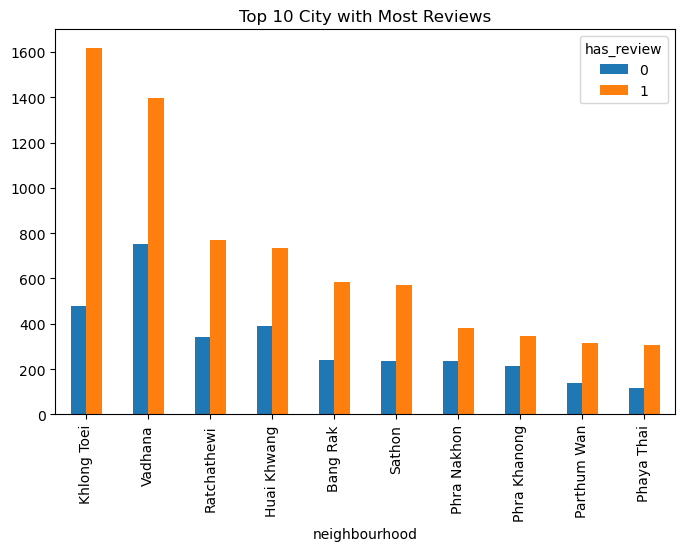

In [134]:
df_cleaned_ct.sort_values(1,ascending=False).head(10).drop(columns='Total').plot(kind='bar',figsize=(8,5), 
title='Top 10 City with Most Reviews')
plt.show()

Dari hasil visualisasi dan cross tabulasi di atas, kita dapat mengidentifikasi **10 neighbourhood (wilayah) dengan jumlah listing tertinggi yang telah menerima review**, serta membandingkannya dengan jumlah listing yang belum direview di wilayah yang sama.

**Khlong Toei** menempati posisi teratas sebagai neighbourhood dengan jumlah listing aktif terbanyak (telah menerima review), yaitu lebih dari 1.600 listing. Wilayah ini juga memiliki jumlah total listing yang cukup besar secara keseluruhan.

Menariknya, **Vadhana** adalah wilayah dengan jumlah listing belum direview tertinggi (sekitar 750), meskipun secara total juga berada di urutan kedua dalam jumlah listing aktif. Ini menunjukkan bahwa Vadhana memiliki potensi listing yang sangat besar, namun sebagian di antaranya belum mendapatkan exposure atau pemesanan.

Sementara itu, wilayah seperti **Ratchathewi**, **Huai Khwang**, dan **Bang Rak** juga memiliki keseimbangan antara listing aktif dan tidak aktif, namun tetap menunjukkan jumlah listing aktif yang dominan.

Hal penting lain yang dapat dicermati:

- **Semua wilayah dalam daftar ini memiliki jumlah listing aktif lebih banyak daripada listing tidak aktif**, yang berarti tamu cenderung menyewa dari wilayah-wilayah populer ini.
- Beberapa wilayah seperti **Phaya Thai** dan **Phra Khanong** memiliki total listing lebih rendah dibandingkan Khlong Toei dan Vadhana, namun tetap konsisten dalam kontribusi listing aktifnya.

Temuan ini memperkuat asumsi bahwa **lokasi listing memiliki peran penting** dalam menentukan apakah suatu listing akan mendapatkan review. Wilayah dengan jumlah review tinggi bisa dijadikan patokan untuk strategi promosi listing baru maupun intervensi Airbnb untuk meningkatkan daya saing listing yang masih belum aktif.



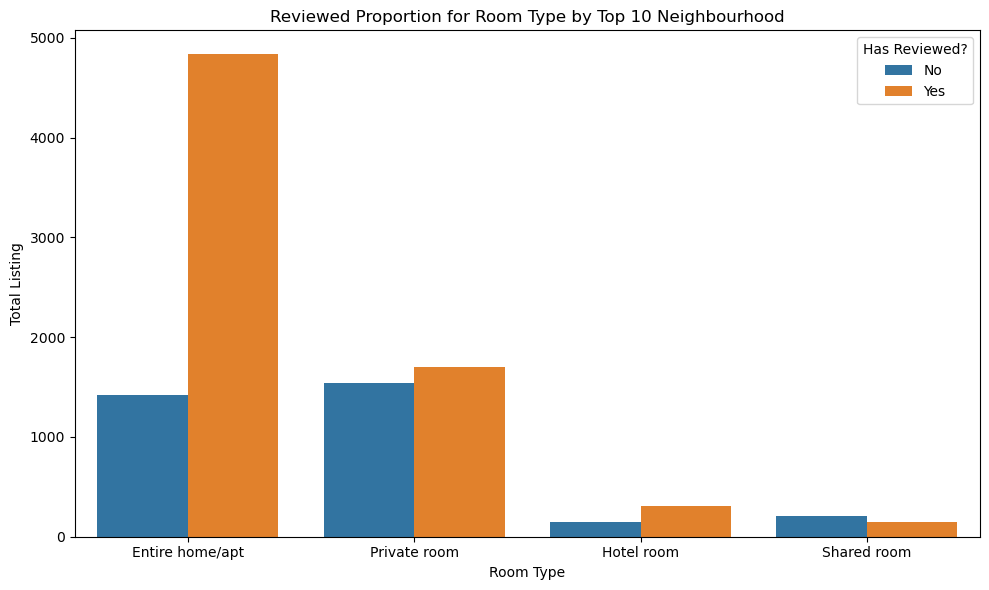

In [136]:
df_top = df_cleaned[df_cleaned['neighbourhood'].isin(listing_neighbourhood.head(10).index)]

plt.figure(figsize=(10, 6))
sns.countplot(x='room_type', hue='has_review', data=df_top)
plt.title('Reviewed Proportion for Room Type by Top 10 Neighbourhood')
plt.xlabel('Room Type')
plt.ylabel('Total Listing')
plt.legend(title='Has Reviewed?', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


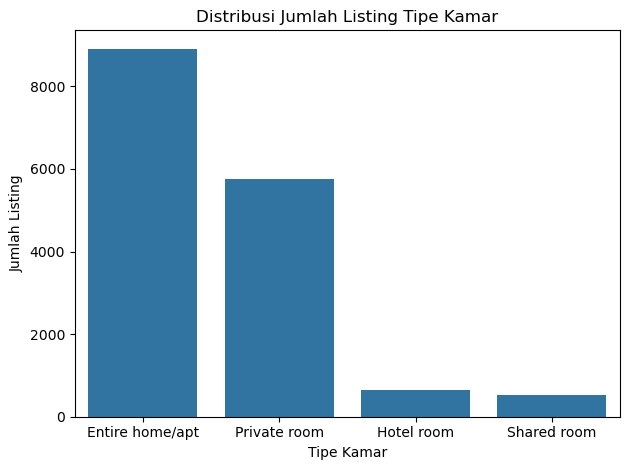

In [110]:
sns.countplot(x='room_type', data=df_cleaned)
plt.title('Distribusi Jumlah Listing Tipe Kamar')
plt.xlabel('Tipe Kamar')
plt.ylabel('Jumlah Listing')
# plt.legend(title='Pernah Direview?', labels=['Tidak', 'Ya'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

berdasarkan visualisasi distribusi diatas berdasarakan dari **Top 10 Kota atau distrik dengan listing terbanyak**, maka dapat dilihat bahwa kategori _entire home/apt_ lebih cenderung di review jika dibandingkan dengan jenis kamar lainnya. Pada tipe kamar lainnya cenderung memiliki proporsi yang hampir sama antara di review dengan tidak. Namun, hal ini perlu diperhatikan lebih baik lagi dimana memang jumlah listing berdasarkan kategori **entire home/apt** memiliki jumlah yang jauh lebih banyak jika dibandingkan dengan jenis kamar lain.

Hal lain yang mendukung Entire Home/apt lebih sering di review karena adanya teori Expectancy Disconfirmation Theory (EDT) yang konsepnya terdapat pada sebuah penelitian oleh [Tom Schiebler et.al](https://link.springer.com/article/10.1007/s11747-024-01078-x) 2025, singkatnya adalah harga yang tinggi pada Entire Home/Apt memungkinkan customer untuk memiliki ekspektasi yang tinggi sehingga disaat expectation meets the expected maka akan timbul ulasan positif. Berikut adalah tabel yangmemudahkan pembacaannya.

Expectancy Disconfirmation Theory (EDT)

EDT menjelaskan bahwa kepuasan muncul dari perbandingan antara **ekspektasi** dan **kenyataan**:

| Ekspektasi vs Kenyataan | Hasil Evaluasi           | Kemungkinan Review          |
|-------------------------|--------------------------|-----------------------------|
| Kenyataan > Ekspektasi  | Positive Disconfirmation | Review positif              |
| Kenyataan = Ekspektasi  | Confirmation             | Mungkin tidak beri review   |
| Kenyataan < Ekspektasi  | Negative Disconfirmation | Review negatif              |

---

Contoh, Misalnya dengan harga yang sama:
- **Entire home/apt** → Ekspektasi tinggi karena asumsi banyak orang Entire Home/apt lebih bagus dan lengkap → Jika puas/kecewa → Lebih besar kemungkinan memberi review
- **Shared room** → Ekspektasi rendah karena yang dipentingkan hanya fungsinya saja → Pengalaman biasa → Jarang memicu review




In [111]:
df_cleaned_rh=pd.crosstab(df_cleaned['room_type'],df_cleaned['has_review'])
df_cleaned_rh['Total']=df_cleaned_rh.sum(axis=1)
df_cleaned_rh.sort_values(1,ascending=False)

has_review,0,1,Total
room_type,,,
Entire home/apt,2343,6568,8911
Private room,2924,2838,5762
Hotel room,199,450,649
Shared room,318,205,523


In [112]:
from scipy.stats import normaltest

for room in df_cleaned['room_type'].unique():
    for review_status in [0, 1]:
        data = df_cleaned[
            (df_cleaned['room_type'] == room) & 
            (df_cleaned['has_review'] == review_status)
        ]['price']
        
        if len(data) >= 20:  # batas aman minimum untuk normaltest
            stat, p = normaltest(data)
            label = 'Direview' if review_status == 1 else 'Tidak Direview'
            print(f"{room} - {label}: p-value = {p:.4f}")
            if p < 0.05:
                print("  → Distribusi: Tidak Normal")
            else:
                print("  → Distribusi: Normal")
        else:
            print(f"{room} - {label}: Jumlah data kurang dari 20")
        print('-------------------------')


Entire home/apt - Tidak Direview: p-value = 0.0000
  → Distribusi: Tidak Normal
-------------------------
Entire home/apt - Direview: p-value = 0.0000
  → Distribusi: Tidak Normal
-------------------------
Private room - Tidak Direview: p-value = 0.0000
  → Distribusi: Tidak Normal
-------------------------
Private room - Direview: p-value = 0.0000
  → Distribusi: Tidak Normal
-------------------------
Hotel room - Tidak Direview: p-value = 0.0000
  → Distribusi: Tidak Normal
-------------------------
Hotel room - Direview: p-value = 0.0000
  → Distribusi: Tidak Normal
-------------------------
Shared room - Tidak Direview: p-value = 0.0000
  → Distribusi: Tidak Normal
-------------------------
Shared room - Direview: p-value = 0.0000
  → Distribusi: Tidak Normal
-------------------------


In [113]:
import pandas as pd
from scipy.stats import chi2_contingency

# Buat tabel kontingensi
ct_rh = pd.crosstab(df_cleaned['room_type'], df_cleaned['has_review'])

# Uji chi-square
chi2, p, dof, expected = chi2_contingency(ct_rh)
print(f'p-value = {p:.4f}')



p-value = 0.0000


**Hasil Uji Statistik:**
- Nilai p-value dari uji Chi-square < 0.05
- Artinya, terdapat **hubungan yang signifikan** antara tipe kamar dan kemungkinan listing tersebut pernah direview

---

**Interpretasi:**

Temuan ini menunjukkan bahwa **tipe kamar memengaruhi kemungkinan sebuah listing mendapatkan review**. Tidak semua tipe kamar memiliki peluang yang sama untuk mendapatkan review dari tamu.


In [114]:
ct = pd.crosstab(df_cleaned['room_type'], df_cleaned['has_review'], normalize='index')
ct*100


has_review,0,1
room_type,,
Entire home/apt,26.293345,73.706655
Hotel room,30.662558,69.337442
Private room,50.746269,49.253731
Shared room,60.803059,39.196941


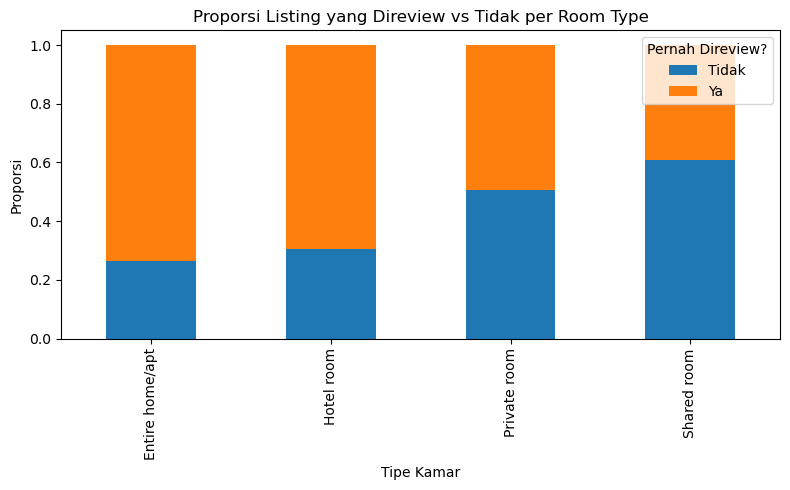

In [115]:
ct.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Proporsi Listing yang Direview vs Tidak per Room Type')
plt.ylabel('Proporsi')
plt.xlabel('Tipe Kamar')
plt.legend(title='Pernah Direview?', labels=['Tidak', 'Ya'])
plt.tight_layout()
plt.show()


Berdasarkan analisis statistik sebelumnya dan visualisasi ini, maka dapat memperkuat statement bahwa **Tipe kamar Entire home/apt punya peluang lebih tinggi untuk mendapat review dibanding tipe kamar lainnya**

Text(0.5, 0, 'Room Type')

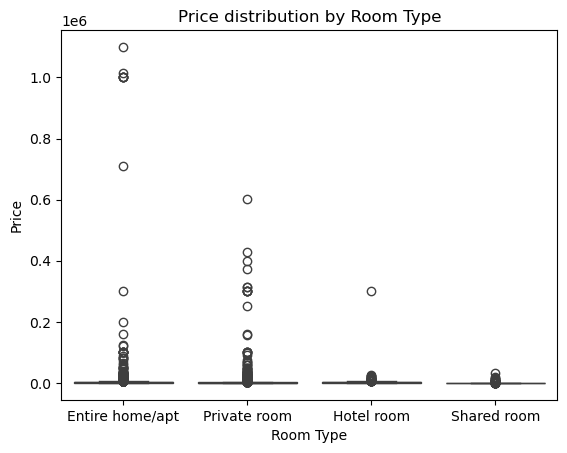

In [137]:
sns.boxplot(x='room_type', y='price', data=df_cleaned)
plt.title('Price distribution by Room Type')
plt.ylabel('Price')
plt.xlabel('Room Type')

In [117]:
from scipy.stats import normaltest

for room in df_cleaned['room_type'].unique():
    for review_status in [0, 1]:
        subset = df_cleaned[
            (df_cleaned['room_type'] == room) & 
            (df_cleaned['has_review'] == review_status)
        ]['price']
        
        stat, p = normaltest(subset)
        print(f"Room Type: {room}, Has Review: {review_status} => p-value = {p}")
        if p < 0.05:
            print('Distribusi : Tidak Normal')
        else:
            print('Distribusi : Normal')
        print('-------------------------')


Room Type: Entire home/apt, Has Review: 0 => p-value = 0.0
Distribusi : Tidak Normal
-------------------------
Room Type: Entire home/apt, Has Review: 1 => p-value = 0.0
Distribusi : Tidak Normal
-------------------------
Room Type: Private room, Has Review: 0 => p-value = 0.0
Distribusi : Tidak Normal
-------------------------
Room Type: Private room, Has Review: 1 => p-value = 0.0
Distribusi : Tidak Normal
-------------------------
Room Type: Hotel room, Has Review: 0 => p-value = 1.9427294480721774e-38
Distribusi : Tidak Normal
-------------------------
Room Type: Hotel room, Has Review: 1 => p-value = 1.042212415490216e-233
Distribusi : Tidak Normal
-------------------------
Room Type: Shared room, Has Review: 0 => p-value = 1.2010974715945333e-99
Distribusi : Tidak Normal
-------------------------
Room Type: Shared room, Has Review: 1 => p-value = 1.7789983515555612e-74
Distribusi : Tidak Normal
-------------------------


karena data tidak terdistribusi normal, maka dapat digunakan Kruskal Walis untuk uji non-parametriknya

Hipotesis Statistik

**H₀ (Hipotesis Nol):**  
Tidak terdapat perbedaan distribusi harga (`price`) antar tipe kamar (`room_type`).  
Dengan kata lain, median harga antar kategori kamar adalah sama.

**Hₐ (Hipotesis Alternatif):**  
Terdapat setidaknya satu pasangan tipe kamar yang memiliki distribusi harga yang berbeda secara signifikan.

**Uji Statistik yang Digunakan**

Uji **Kruskal–Wallis H Test**, yaitu uji non-parametrik yang digunakan untuk menguji apakah terdapat perbedaan signifikan antara dua atau lebih kelompok independen ketika data tidak memenuhi asumsi normalitas.

In [118]:
from scipy.stats import kruskal

for review_status in [0, 1]:
    print(f"=== Uji Kruskal–Wallis untuk has_review = {review_status} ===")

    # Ambil price untuk setiap room_type dengan filter has_review
    group_data = [
        df_cleaned[(df_cleaned['room_type'] == rt) & (df_cleaned['has_review'] == review_status)]['price']
        for rt in df_cleaned['room_type'].unique()
    ]
    
    # Uji Kruskal-Wallis
    stat, p = kruskal(*group_data)

    print(f'Statistik uji: {stat:.4f}')
    print(f'p-value: {p:.4f}')
    if p < 0.05:
        print('→ Terdapat perbedaan signifikan harga antar room_type.')
    else:
        print('→ Tidak terdapat perbedaan signifikan harga antar room_type.')
    print('---------------------------------------------')


=== Uji Kruskal–Wallis untuk has_review = 0 ===
Statistik uji: 475.9942
p-value: 0.0000
→ Terdapat perbedaan signifikan harga antar room_type.
---------------------------------------------
=== Uji Kruskal–Wallis untuk has_review = 1 ===
Statistik uji: 894.1774
p-value: 0.0000
→ Terdapat perbedaan signifikan harga antar room_type.
---------------------------------------------


**Analisis Perbedaan Harga berdasarkan Room Type**

Berdasarkan uji Kruskal–Wallis, diperoleh bahwa:

- Untuk listing yang tidak pernah direview (`has_review = 0`), terdapat perbedaan harga yang signifikan antar tipe kamar (p < 0.05).
- Untuk listing yang pernah mendapatkan review (`has_review = 1`), juga terdapat perbedaan harga signifikan antar tipe kamar (p < 0.05).

Temuan ini menunjukkan bahwa harga sewa antar jenis kamar memang berbeda secara statistik, baik pada listing yang direview maupun tidak.

Dengan kata lain, tipe kamar memiliki pola harga tertentu yang konsisten, terlepas dari status review. Misalnya, `Entire home/apt` cenderung memiliki harga lebih tinggi dibanding `Private room` atau `Hotel room` maupun `Shared room`.

Temuan ini dapat menjadi dasar untuk memahami struktur harga dan preferensi pengguna dalam memilih jenis akomodasi.


# Berdasarkan Ketersediaan dalam setahun

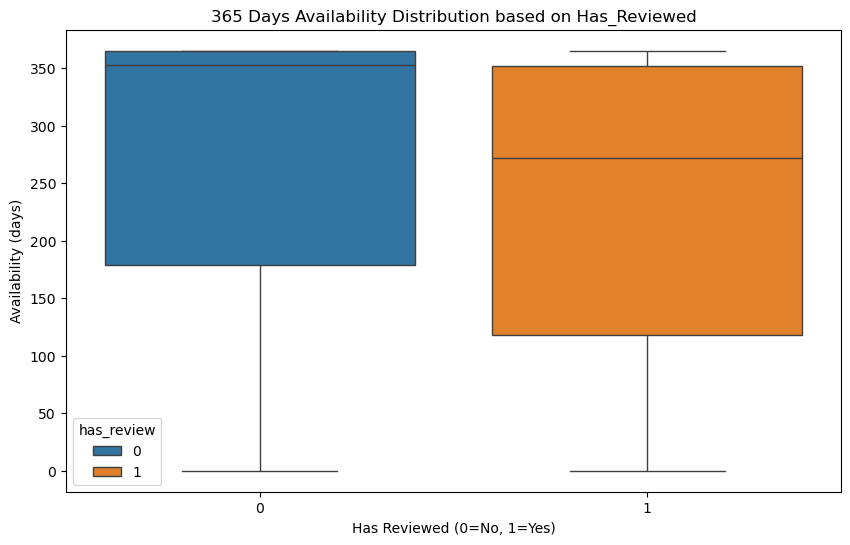

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Misal df_cleaned sudah punya kolom has_reviewed dan availability_365

plt.figure(figsize=(10,6))

sns.boxplot(x='has_review', y='availability_365', data=df_cleaned, hue='has_review')
plt.title('365 Days Availability Distribution based on Has_Reviewed')
plt.xlabel('Has Reviewed (0=No, 1=Yes)')
plt.ylabel('Availability (days)')
plt.show()


Insight Distribusi Availability Berdasarkan Has_Reviewed
Median Availability

- Listing yang belum pernah direview (has_reviewed=0) memiliki median availability sekitar 350 hari per tahun, artinya sebagian besar listing ini tersedia hampir sepanjang tahun.
- Listing yang sudah pernah direview (has_reviewed=1) memiliki median availability lebih rendah, sekitar 270 hari per tahun.

Rentang Availability

- Listing yang belum direview memiliki rentang availability yang lebih sempit dan cenderung tinggi (dari sekitar 100 hari sampai hampir 365 hari).

- Listing yang sudah direview memiliki rentang availability lebih lebar, mulai dari 0 sampai hampir 365 hari, yang menunjukkan beberapa listing mungkin hanya tersedia sedikit hari dalam setahun.

Interpretasi

- Listing yang sudah pernah direview cenderung memiliki ketersediaan yang lebih variatif dan rata-rata lebih rendah. Ini bisa jadi karena listing yang sering dipesan (dan direview) mungkin tidak tersedia sepanjang tahun karena sering penuh booking.

- Sebaliknya, listing yang belum pernah direview cenderung tersedia lebih lama dan mungkin kurang diminati, sehingga lebih sering tersedia.

Implikasi Bisnis

- Listing dengan ketersediaan tinggi tapi belum pernah direview bisa jadi kurang menarik atau kurang dikenal oleh tamu. Strategi promosi atau peningkatan layanan bisa dipertimbangkan untuk meningkatkan review dan booking.

- Listing dengan review yang sudah ada menunjukkan pola penggunaan yang lebih aktif dan beragam ketersediaan, jadi pengelola listing bisa fokus mempertahankan kualitas dan manajemen jadwal.

# Berdasarkan Keaktifan : `reviews_per_month`

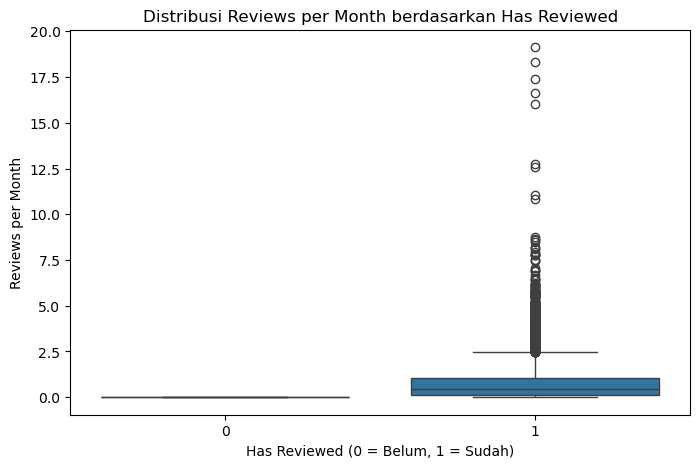

In [120]:
plt.figure(figsize=(8,5))
sns.boxplot(x='has_review', y='reviews_per_month', data=df_cleaned)
plt.title('Distribusi Reviews per Month berdasarkan Has Reviewed')
plt.xlabel('Has Reviewed (0 = Belum, 1 = Sudah)')
plt.ylabel('Reviews per Month')
plt.show()


In [121]:
df_cleaned['reviews_per_month'].describe()

count    15845.000000
mean     0.516464    
std      0.952948    
min      0.000000    
25%      0.000000    
50%      0.090000    
75%      0.670000    
max      19.130000   
Name: reviews_per_month, dtype: float64

**Interpretasi Visualisasi Reviews per Month berdasarkan Has Reviewed**

Visualisasi boxplot ini menunjukkan distribusi `reviews_per_month` (jumlah rata-rata review per bulan) berdasarkan status `has_review`, yaitu apakah listing sudah pernah mendapatkan review atau belum.

Listing dengan `has_review = 1` (Sudah Pernah Direview)
- Memiliki nilai `reviews_per_month` yang bervariasi, dari sangat rendah hingga sangat tinggi.
- Median review per bulan berkisar antara 0.3–0.5 (sekitar 3–6 review per tahun).
- Terdapat banyak outlier: beberapa listing menerima lebih dari 10 review per bulan.
- Ini menunjukkan bahwa tidak semua listing yang sudah pernah direview bersifat aktif, tetapi ada keragaman tingkat aktivitasnya.

Listing dengan `has_review = 0` (Belum Pernah Direview)
- Semua nilai `reviews_per_month` adalah 0.
- Ini logis, karena listing yang belum pernah direview tidak mungkin memiliki review per bulan.
- Menandakan tidak adanya aktivitas review, kemungkinan karena listing baru, kurang menarik, atau jarang tersedia.

Kesimpulan
- `reviews_per_month` adalah indikator yang sangat kuat terhadap status `has_review`.
- Visualisasi menegaskan adanya perbedaan signifikan dalam keaktifan listing antara yang sudah dan belum direview.
- Dapat dijadikan dasar untuk strategi promosi listing yang belum memiliki review.


# Berdasarkan durasi minimal malam pemesanan
Dalam melakukan analisis Hubungan antara ``has_review`` dan ``minimum_nights``, terdapat sebuah pertanyaan berupa :
- Apakah ada perbedaan signifikan dalam `minimum_nights` antara listing yang pernah direview (`has_review` = 1) dan yang belum pernah direview (`has_review` = 0)?

In [122]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15845 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15845 non-null  object        
 1   name                            15845 non-null  object        
 2   host_id                         15845 non-null  object        
 3   host_name                       15845 non-null  object        
 4   neighbourhood                   15845 non-null  object        
 5   latitude                        15845 non-null  float64       
 6   longitude                       15845 non-null  float64       
 7   room_type                       15845 non-null  object        
 8   price                           15845 non-null  int64         
 9   minimum_nights                  15845 non-null  int64         
 10  number_of_reviews               15845 non-null  int64         
 11  last_re

In [123]:
desc_stats = df_cleaned.groupby('has_review')['minimum_nights'].describe()
print(desc_stats)

              count       mean        std  min  25%  50%  75%     max
has_review                                                           
0           5784.0   19.444675  62.108179  1.0  1.0  1.0  7.0  1115.0
1           10061.0  12.917106  42.847797  1.0  1.0  2.0  7.0  1125.0


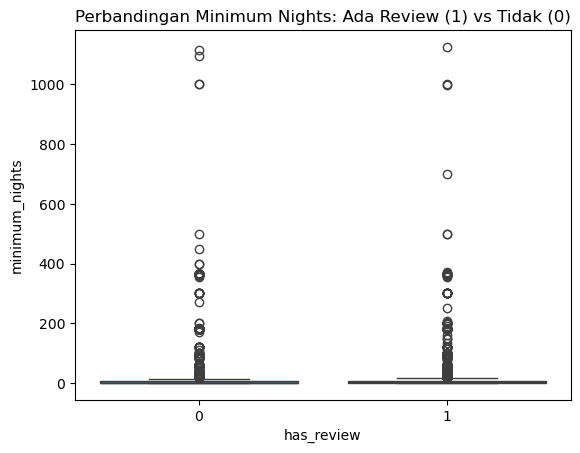

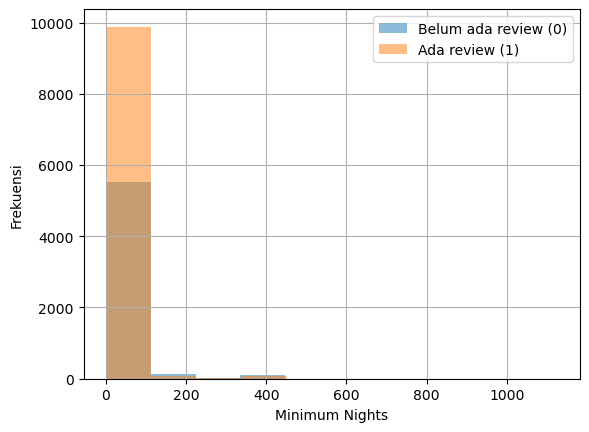

In [124]:
sns.boxplot(x='has_review', y='minimum_nights', data=df_cleaned)
plt.title("Perbandingan Minimum Nights: Ada Review (1) vs Tidak (0)")
plt.show()

# Histogram
df_cleaned[df_cleaned['has_review'] == 0]['minimum_nights'].hist(alpha=0.5, label='Belum ada review (0)')
df_cleaned[df_cleaned['has_review'] == 1]['minimum_nights'].hist(alpha=0.5, label='Ada review (1)')
plt.legend()
plt.xlabel("Minimum Nights")
plt.ylabel("Frekuensi")
plt.show()


In [125]:
min_nights_reviewed = df_cleaned[df_cleaned['has_review'] == 1]['minimum_nights']
min_nights_no_reviewed = df_cleaned[df_cleaned['has_review'] == 0]['minimum_nights']

from scipy.stats import normaltest

stats, pval = normaltest(min_nights_reviewed)
print('P val Reviewed = ',pval)
if pval < 0.05:
    print('Distribusi : Tidak Normal')
else:
    print('Distribusi : Normal')
print('-------------------------')

stats, pval = normaltest(min_nights_no_reviewed)
print('P val No Reviewed = ',pval)
if pval < 0.05:
    print('Distribusi : Tidak Normal')
else:
    print('Distribusi : Normal')
print('-------------------------')

P val Reviewed =  0.0
Distribusi : Tidak Normal
-------------------------
P val No Reviewed =  0.0
Distribusi : Tidak Normal
-------------------------


Karena data tidak terdistribusi normal baik itu yang sudah direview maupun tidak, maka dilakukan uji Mann-Whitney U antara yg di **Review dengan tidak di review**

Hipotesis

- Hipotesis Nol (H₀): Tidak terdapat pengaruh signifikan dalam pada minimum_nights antara listing yang memiliki dan tidak memiliki review.

- Hipotesis Alternatif (H₁): Terdapat pengaruh signifikan dalam pada minimum_nights antara listing yang memiliki dan tidak memiliki review.

In [126]:
bins = [0, 1, 3, 7, 14, 30, 90, df_cleaned['minimum_nights'].max()]
labels = ['1 malam', '2-3 malam', '4-7 malam', '8-14 malam', '15-30 malam', '31-90 malam', '91+ malam']
df_cleaned['min_nights_bin'] = pd.cut(df_cleaned['minimum_nights'], bins=bins, labels=labels)

# Pivot jumlah listing
pivot_jumlah = df_cleaned.pivot_table(
    index='min_nights_bin',
    columns='has_review',
    values='minimum_nights',
    aggfunc='count',
    fill_value=0
)

# Hitung persentase has_review = 1
pivot_jumlah['Persentase Ada Review (%)'] = (
    pivot_jumlah[1] / (pivot_jumlah[0] + pivot_jumlah[1]) * 100
).round(2)

# Rename kolom biar lebih deskriptif (opsional)
pivot_jumlah.columns = ['Tanpa Review (0)', 'Ada Review (1)', 'Persentase Ada Review (%)']

# Tampilkan tabel
pivot_jumlah


C:\Users\dhika\AppData\Local\Temp\ipykernel_10052\2439080769.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_jumlah = df_cleaned.pivot_table(


,Tanpa Review (0),Ada Review (1),Persentase Ada Review (%)
min_nights_bin,,,
1 malam,3384,4867,58.99
2-3 malam,664,2029,75.34
4-7 malam,332,827,71.35
8-14 malam,100,275,73.33
15-30 malam,872,1627,65.11
31-90 malam,177,240,57.55
91+ malam,255,196,43.46


In [154]:
# Crosstab dalam bentuk proporsi baris (per bin minimum nights)
crosstab_proporsi = pd.crosstab(
    df_cleaned['min_nights_bin'], 
    df_cleaned['has_review'], 
    normalize='index'
).round(3)

# Ubah nama kolom biar lebih jelas
crosstab_proporsi.columns = ['No Review (0)', 'Review (1)']
crosstab_proporsi *= 100  # ubah ke persen
crosstab_proporsi.sort_values(by=['Review (1)'],ascending=False, inplace=True)


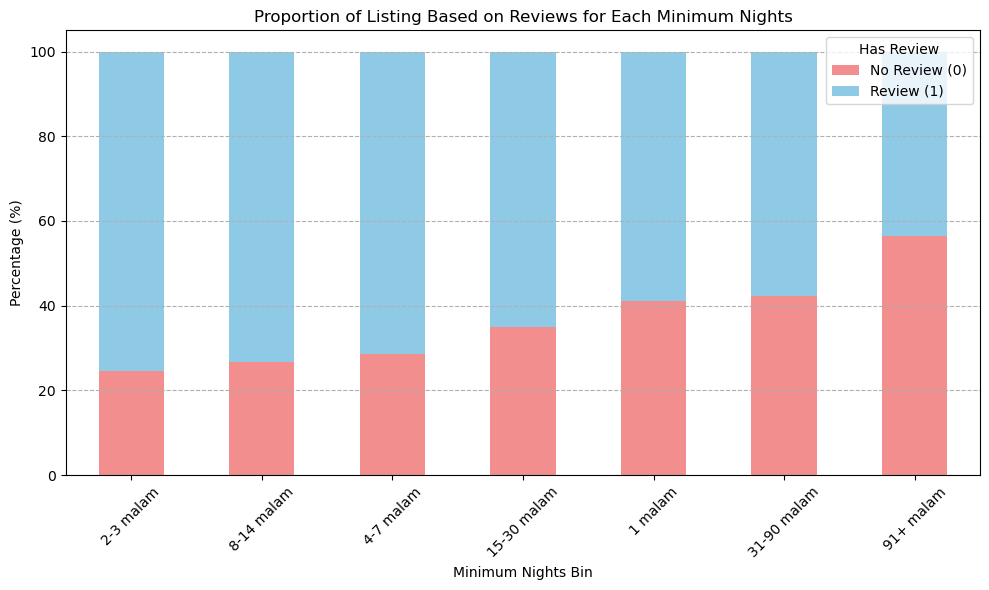

In [158]:
# Plot
crosstab_proporsi.plot(kind='bar', stacked=True, color=['#f28e8e', '#8ecae6'], figsize=(10,6))

plt.title('Proportion of Listing Based on Reviews for Each Minimum Nights')
plt.xlabel('Minimum Nights Bin')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Has Review')
plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()


Dapat terlihta bahwa :
- Listing dengan durasi sewa 2–3 malam menunjukkan tingkat review tertinggi (75,34%), menandakan bahwa tamu jangka pendek sangat aktif memberikan ulasan.
- Durasi 4–14 malam juga menunjukkan performa review yang tinggi (>70%), menjadikannya segmen potensial untuk meningkatkan engagement tamu.
- Durasi 91+ malam memiliki tingkat review paling rendah (43,48%), yang mungkin karena:
    - Tamu jangka panjang lebih jarang membuka platform setelah check-in.
    - Kurangnya insentif untuk memberi ulasan setelah waktu yang lama.
- Durasi 1 malam merupakan kategori dengan volume listing terbanyak, namun review-nya masih moderat (58,98%), sehingga ada peluang peningkatan melalui follow-up otomatis atau notifikasi review.

In [127]:
from scipy import stats
stat, p = stats.mannwhitneyu(min_nights_reviewed, min_nights_no_reviewed)
print(f"Hasil Uji Mann-Whitney U: p-value = {p:.4f}")

if p < 0.05:
    print("Tolak H0; Ada pengaruh signifikan")
else:
    print("Gagal Menolak H0; Tidak ada pengaruh signifikan.")

Hasil Uji Mann-Whitney U: p-value = 0.0000
Tolak H0; Ada pengaruh signifikan


Interpretasinya adalah :

Listing yang memiliki review menunjukkan distribusi minimum_nights yang berbeda dibandingkan dengan listing yang tidak memiliki review. Kemungkinan:

- Listing dengan review menetapkan minimum stay yang lebih pendek, sehingga lebih menarik bagi tamu.

- Listing tanpa review menetapkan syarat minimum nights yang lebih tinggi → kurang menarik & jarang dikunjungi.

# Kesimpulan dan Rekomendasi

#### **Kesimpulan**

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan berikut tentang listing Airbnb di Bangkok yang aktif (pernah menerima review):

* Dari 15,845 listing yang tersedia, hanya 10,061 listing (sekitar 63%) yang pernah mendapatkan review dari pengguna.
* Listing paling banyak ditemukan di neighbourhood **Khlong Toei** dan **Vadhana**.
* Mayoritas listing menggunakan tipe kamar **Entire home/apt** dan **Private room**.
* Secara harga, listing aktif memiliki harga yang **tidak terlalu tinggi (moderat)** dibandingkan listing tidak aktif.
* Berdasarkan tingkat ketersediaan (availability), listing aktif memiliki **median availability sekitar 270 hari per tahun**, tidak selalu tersedia atau penuh karena banyaknya pemesanan.
* Listing aktif memiliki nilai **`reviews_per_month` yang bervariasi**, dan sering kali menjadi indikator kuat terhadap keaktifan listing.
* Terkait durasi minimum pemesanan (minimum_nights):
    * Listing aktif lebih sering menetapkan minimum nights yang pendek, seperti 2–3 malam atau 4–7 malam.
    * Listing dengan minimum stay terlalu panjang (91+ malam) jauh lebih jarang mendapatkan review.
    * Hasil uji Mann-Whitney menunjukkan perbedaan signifikan antara listing aktif dan tidak aktif terkait minimum_nights.

Karakteristik listing yang aktif (pernah direview), terutama dibandingkan listing yang tidak aktif (belum pernah direview), adalah sebagai berikut:

* Mayoritas berasal dari **neighbourhood strategis** seperti Khlong Toei dan Watthana, yang juga merupakan area dengan jumlah listing terbanyak secara keseluruhan.
* Lebih sering berupa **Private room** atau **Entire home/apt**, sedangkan listing tidak aktif cenderung berupa **Shared room** atau **Hotel room**.
* Listing aktif **tidak selalu tersedia 365 hari** dalam setahun, karena sering terisi, sementara listing tidak aktif justru sering tersedia sepanjang tahun namun tidak diminati.
* Listing aktif memiliki nilai `reviews_per_month` yang signifikan, sedangkan listing tidak aktif selalu memiliki `reviews_per_month = 0`.
* Listing yang aktif cenderung **lebih menarik dan kompetitif**, baik dari segi harga, lokasi, maupun tipe kamar.
* Listing aktif lebih sering menetapkan minimum nights yang pendek, seperti 2–3 malam atau 4–7 malam.
* Listing dengan minimum stay terlalu panjang (91+ malam) jauh lebih jarang mendapatkan review.



#### **Rekomendasi**
1. Fokus promosi dan dukungan operasional bisa diarahkan ke neighbourhood yang telah terbukti memiliki performa tinggi, seperti **Khlong Toei** dan **Vadhana**.
   * Akan lebih baik apabila Airbnb juga mendorong listing di luar dua wilayah ini untuk mengurangi ketergantungan pada satu-dua area dominan, serta membuka potensi wilayah lain yang belum tereksplorasi.
2. Prioritaskan listing dengan **tipe kamar Entire home/apt** atau **Private room**, karena lebih banyak mendapatkan review dari pengguna.
3. Dorong listing yang memiliki **harga sewa moderat**, karena harga ekstrem (terlalu murah atau terlalu mahal) cenderung kurang mendapatkan review.
   * Akan lebih baik jika Airbnb menyediakan analisis pasar harga otomatis berdasarkan wilayah dan jenis kamar untuk membantu host menentukan harga ideal.
4. Promosikan listing yang memiliki **availability realistis** (tidak 365 hari penuh), karena listing aktif cenderung memiliki ketersediaan yang lebih fleksibel dan sesuai permintaan.
5. Gunakan metrik `reviews_per_month` sebagai indikator utama dalam sistem peringkat listing.
   * Listing dengan nilai ini > 0 dapat diprioritaskan untuk muncul di hasil pencarian, sedangkan listing dengan nilai nol bisa mendapat treatment khusus seperti "boosted exposure".
6. Luncurkan program onboarding dan edukasi untuk host baru.
   * Banyak listing tidak aktif adalah listing baru. Edukasi tentang optimasi halaman, deskripsi, dan kalender dapat membantu mendapatkan pemesanan pertama.
7. Eksperimen dengan **insentif pemesanan pertama**.
   * Listing baru atau belum direview bisa diberi badge khusus atau potongan harga sementara agar menarik perhatian pengguna.
8. Minimum nights yang fleksibel:

   * Listing sebaiknya tidak menetapkan minimum_nights terlalu panjang. Durasi 2–7 malam terbukti memiliki peluang review tertinggi.
   * Airbnb dapat memberikan peringatan atau saran otomatis kepada host jika mereka menetapkan minimum stay terlalu tinggi.

Dengan mempersempit *pool* listing yang diprioritaskan untuk promosi dan optimasi, diharapkan analisis ini dapat membantu Airbnb dan para host untuk **mengurangi listing tak aktif**, **meningkatkan engagement pengguna**, serta **mengelompokkan listing berdasarkan strategi pengembangan yang paling sesuai**.


In [128]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15845 entries, 0 to 15853
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15845 non-null  object        
 1   name                            15845 non-null  object        
 2   host_id                         15845 non-null  object        
 3   host_name                       15845 non-null  object        
 4   neighbourhood                   15845 non-null  object        
 5   latitude                        15845 non-null  float64       
 6   longitude                       15845 non-null  float64       
 7   room_type                       15845 non-null  object        
 8   price                           15845 non-null  int64         
 9   minimum_nights                  15845 non-null  int64         
 10  number_of_reviews               15845 non-null  int64         
 11  last_re

In [129]:
# df_cleaned.to_excel("Airbnb Listings Bangkok.xlsx")